This data consist of a table containing 80,000+ records of UFO sightings between 949 and 2014, including city, state, country, lat/long, shape, duration, date/time, and comments. 

In this project I will be utilizing different libraries to import, clean, and transform the data in order to perform exploratory data analysis.

Recommended Analysis:
1) Figure out which shapes of UFO's tend to be seen the most?
2) Take a look at data since the year 2000. How have annual sightings trended?
3) Dig into the US data. Which states report the most UFO sightings? What do you think about this?
4) Create a histogram to understand the distribution of the duration of UFO sightings (data cleaning required).
5) Look at the data in the comments column. What other interesting insights can you pull out of this data?

###### (Source: National UFO Reporting Center)

###### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
%matplotlib inline 
from matplotlib import style 
style.use("ggplot") 
import seaborn as sns 
sns.set_style("darkgrid") 

###### **Reading the data into a Pandas Dataframe**

In [3]:
ufo_sightings = pd.read_csv(r"C:\Users\mjaso\Downloads\ufo_sightings_scrubbed.csv\ufo_sightings_scrubbed.csv", low_memory=False)

###### **Viewing the first and last 5 rows of data**

In [4]:
ufo_sightings.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [5]:
ufo_sightings.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556
80331,2013-09-09 23:00:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,2013-09-30,35.6527778,-97.477778


The data in this dataframe looks consistent, I will now move on to examining the data further.

##### DATA EXAMINATION

###### **Checking for duplicated rows of data**

In [6]:
duplicated_data = ufo_sightings.duplicated().sum()
print(f"There are {duplicated_data} rows of duplicated data in the 'ufo_sightings' dataframe.") 

There are 0 rows of duplicated data in the 'ufo_sightings' dataframe.


###### **Checking the number of null values in each column**

In [7]:
for null in ufo_sightings.columns:
    na_val = ufo_sightings[null].isna().sum()
    print(f"The column {null} has {na_val} N/A values.") 

The column datetime has 0 N/A values.
The column city has 0 N/A values.
The column state has 5797 N/A values.
The column country has 9670 N/A values.
The column shape has 1932 N/A values.
The column duration (seconds) has 0 N/A values.
The column duration (hours/min) has 0 N/A values.
The column comments has 15 N/A values.
The column date posted has 0 N/A values.
The column latitude has 0 N/A values.
The column longitude  has 0 N/A values.


###### **Checking the number of unique values in each column**

In [8]:
for uni in ufo_sightings.columns:
    vals = ufo_sightings[uni].nunique()
    print(f"There are {vals} unique values in the column {uni}.") 

There are 69474 unique values in the column datetime.
There are 19900 unique values in the column city.
There are 67 unique values in the column state.
There are 5 unique values in the column country.
There are 29 unique values in the column shape.
There are 536 unique values in the column duration (seconds).
There are 8304 unique values in the column duration (hours/min).
There are 79997 unique values in the column comments.
There are 317 unique values in the column date posted.
There are 18421 unique values in the column latitude.
There are 19455 unique values in the column longitude .


###### **Checking the dataframes datatypes**

In [9]:
ufo_sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


###### **Checking the numerical columns for statistical information**

In [10]:
ufo_sightings.describe()

,longitude
count,80332.000000
mean,-86.772885
std,39.697205
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755000
max,178.441900


###### **Checking the categorical columns for statistical information**

In [11]:
ufo_sightings.describe(include="object")

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude
count,80332,80332,74535,70662,78400,80332,80332,80317,80332,80332
unique,69474,19900,67,5,29,536,8304,79997,317,18421
top,2010-07-04 22:00:00,seattle,ca,us,light,300,5 minutes,Fireball,2009-12-12,47.6063889
freq,36,525,9655,65114,16565,8635,4716,11,1510,581


Some columns in this dataframe will need to be cleaned and trasnformed. Starting with the 'datetime' and 'date posted' columns, I will first transform the 'datetime' and 'date posted' columns to datetime datatypes and then extract the date and time values from those columns and store them in their own variables named 'date', 'time', and 'date posted'. I will then capitalize all character in each row of the 'city' and 'country' column. Lastly, I will convert the 'latitude' column into a float datatype.

##### DATA CLEANING

###### **Converting date columns into datetime datatypes**

In [12]:
ufo_sightings["datetime"] = pd.to_datetime(ufo_sightings["datetime"])
ufo_sightings["date posted"] = pd.to_datetime(ufo_sightings["date posted"])

###### **Extracting the time and date values from the 'datetime' column and storing them in their own variables**

In [13]:
ufo_sightings["date"] = ufo_sightings["datetime"].dt.date
ufo_sightings["year"] = ufo_sightings["datetime"].dt.year 
ufo_sightings["month"] = ufo_sightings["datetime"].dt.month_name()
ufo_sightings["day"] = ufo_sightings["datetime"].dt.day_name()
ufo_sightings["time"] = ufo_sightings["datetime"].dt.time
ufo_sightings["hour"] = ufo_sightings["datetime"].dt.hour
ufo_sightings["posted year"] = ufo_sightings["date posted"].dt.year
ufo_sightings["posted month"] = ufo_sightings["date posted"].dt.month_name()
ufo_sightings["posted day"] = ufo_sightings["date posted"].dt.day_name()

I also decided to extract the year, month, and day from the newly created 'date' and 'posted date' columns as well as extract the hour from the 'datetime' column. This information can help provide a more in depth analysis.

###### **Capitalizing all character in the 'state' and 'country' column**

In [14]:
ufo_sightings["state"] = ufo_sightings["state"].str.upper()
ufo_sightings["country"] = ufo_sightings["country"].str.upper()

###### **Replacing non numeric characters from 'latitude' column so values can be converted to float datatypes** 

In [15]:
ufo_sightings["latitude"] = ufo_sightings["latitude"].replace({"[^0-9]":""}, regex=True)

###### **Converting the 'latitude' column into a float datatype**

In [16]:
ufo_sightings["latitude"] = ufo_sightings["latitude"].astype(float)

Now that the dataframe has been cleaned, I will check to make sure that all changes have been sucessfully made.

###### **Checking that the new columns have been sucessfully created by displaying the first 5 rows**


In [17]:
ufo_sightings[["date", "year", "month", "day", "time", "hour", "posted year", "posted month", "posted day"]].head()

,date,year,month,day,time,hour,posted year,posted month,posted day
0,1949-10-10,1949,October,Monday,20:30:00,20,2004,April,Tuesday
1,1949-10-10,1949,October,Monday,21:00:00,21,2005,December,Friday
2,1955-10-10,1955,October,Monday,17:00:00,17,2008,January,Monday
3,1956-10-10,1956,October,Wednesday,21:00:00,21,2004,January,Saturday
4,1960-10-10,1960,October,Monday,20:00:00,20,2004,January,Thursday


Those columns are sufficient, now I will make sure that the 'datetime' column and the 'date posted' column have been converted to the correct datatype.

###### **Checking the datatypes of the converted date columns**

In [18]:
ufo_sightings[["datetime", "date posted"]].dtypes

datetime       datetime64[ns]
date posted    datetime64[ns]
dtype: object

Both of those columns are sufficient, now I will look at all the columns to ensure all columns have been created.

###### **Verifying the addition of the newly created columns in the dataframe**

In [19]:
ufo_sightings.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'date', 'year', 'month', 'day', 'time', 'hour',
       'posted year', 'posted month', 'posted day'],
      dtype='object')

Perfect, all of the new columns have been sucessfully created. Now I will verify that the 'latitude' column has been converted to float datatype.

###### **Checking the datatype of the 'latitude' column**

In [20]:
ufo_sightings["latitude"].dtype

dtype('float64')

Execellent! Lastly, I will check the size of this dataframe by checking the number of columns and rows before I begin to answer the questions.

###### **Checking the size of the 'ufo_sightings' dataframe**

In [21]:
row_count = ufo_sightings.shape[0]
col_count = ufo_sightings.shape[1]
print(f"The dataframe 'ufo_sightings' has {row_count} rows and {col_count} columns.") 

The dataframe 'ufo_sightings' has 80332 rows and 20 columns.


##### RECOMMENDED ANALYSIS:

1) Figure out which shapes of UFO's tend to be seen the most?

In [22]:
top_10_ufo_shapes = ufo_sightings["shape"].value_counts().reset_index()[:10]
top_10_ufo_shapes = top_10_ufo_shapes.rename(columns={"index": "shape", 
                                                      "shape": "count of shape"})
top_10_ufo_shapes

,shape,count of shape
0,light,16565
1,triangle,7865
2,circle,7608
3,fireball,6208
4,other,5649
5,unknown,5584
6,sphere,5387
7,disk,5213
8,oval,3733
9,formation,2457


The table above indicates that shapes that appear as light, tend to be seen UFO shape. Triangle shaped UFO's are the second most seen shape and circle shaped UFO's are the third most seen UFO shape. 

Below is a bar chart representing the count of the most seen UFO shapes.

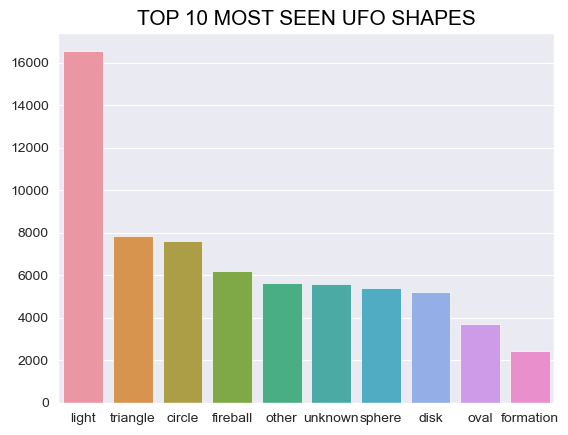

In [23]:
sns.barplot(x="shape",
            y="count of shape",
            data=top_10_ufo_shapes)
plt.title("TOP 10 MOST SEEN UFO SHAPES",
          color="black",
          fontsize=15)
plt.xlabel("") 
plt.ylabel("") 
print("") 

2) Take a look at data since the year 2000. How have annual sightings trended?

In [24]:
annual_sightings_trended_since_2000 = ufo_sightings[ufo_sightings["year"] >= 2000].year.value_counts().reset_index() 
annual_sightings_trended_since_2000 = annual_sightings_trended_since_2000.rename(columns={"index": "year",
                                                                                          "year": "count of sightings"}).sort_values(by="year", ascending=True).reset_index(drop=True)
annual_sightings_trended_since_2000

,year,count of sightings
0,2000,2772
1,2001,3122
2,2002,3235
3,2003,3962
4,2004,4257
5,2005,4083
6,2006,3721
7,2007,4269
8,2008,4819
9,2009,4542


Since the year 2000, annual sightings have trended upwards in a positive direction, and the annual sightings have significantly dropped in the year 2014.

Below is a scatter plot to visualize how annual sightings have trended since the year 2000.

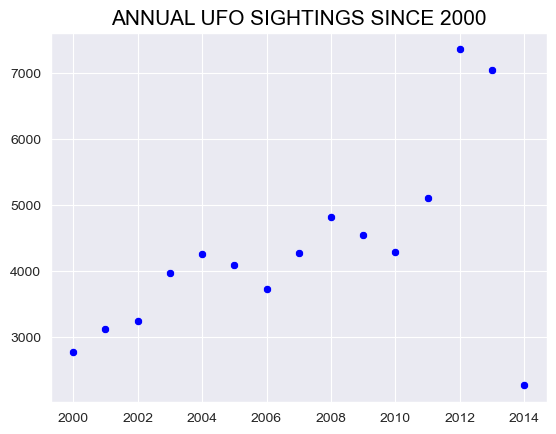

In [25]:
sns.scatterplot(data=annual_sightings_trended_since_2000,
                x="year",
                y="count of sightings", 
                color="blue") 
plt.title("ANNUAL UFO SIGHTINGS SINCE 2000",
          color="black",
          fontsize=15)
plt.xlabel("") 
plt.ylabel("") 
print("") 

3) Dig into the US data. Which states report the most UFO sightings? What do you think about this?

In [26]:
most_ufo_sightings_by_us_state = ufo_sightings[ufo_sightings["country"] == "US"].state.value_counts().sort_values(ascending=False).reset_index()
most_ufo_sightings_by_us_state = most_ufo_sightings_by_us_state.rename(columns={"index": "state",
                                                                                "state": "count of sightings"})
most_ufo_sightings_by_us_state


,state,count of sightings
0,CA,8912
1,WA,3966
2,FL,3835
3,TX,3447
4,NY,2980
5,IL,2499
6,AZ,2414
7,PA,2366
8,OH,2275
9,MI,1836


The top 5 states that report the most UFO sightings are CA, WA, FL, TX, and NY. I think that it is interesting that the state of CA reports more than double the amount of sighting than the other states. Perhaps there is something that is happening in the state of CA that attracts visitation from UFO's or something that is appealing about the landscape of CA. 

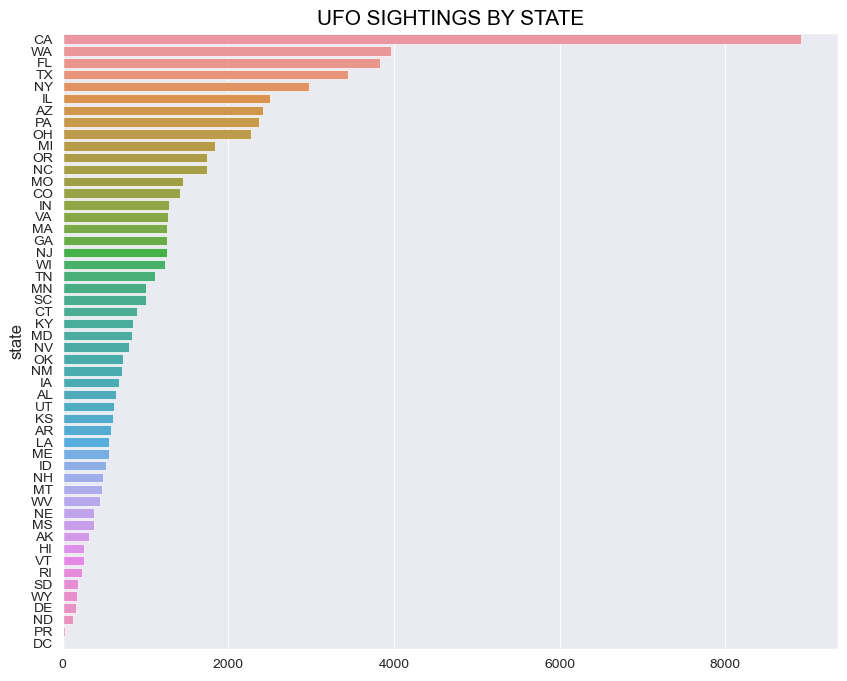

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x="count of sightings", 
            y="state",
            data=most_ufo_sightings_by_us_state)
plt.title("UFO SIGHTINGS BY STATE",
          color="black",
          fontsize=15)
plt.xlabel("") 
print("") 

4) Create a histogram to understand the distribution of the duration of UFO sightings.

The distribution of the duration of UFO sightings represented in a histogram.


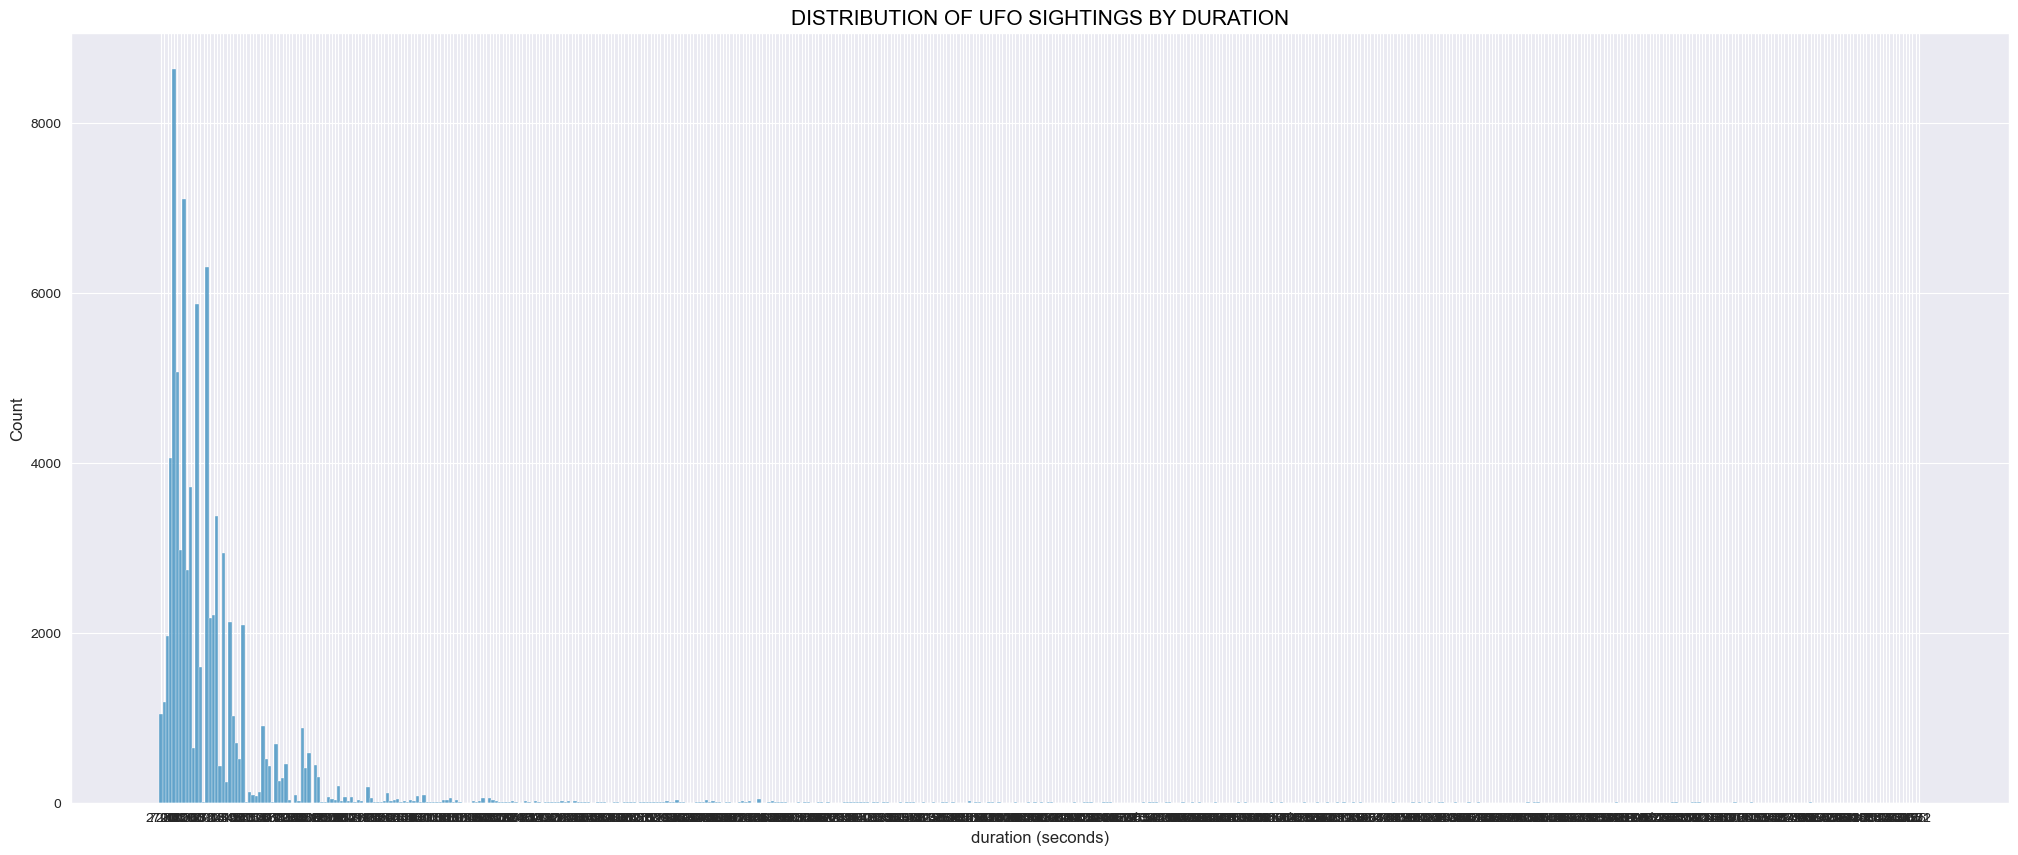

In [111]:
plt.figure(figsize=(25,10))
dist_of_duration_of_ufo_sightings = ufo_sightings["duration (seconds)"]
sns.histplot(data=dist_of_duration_of_ufo_sightings)
plt.title("DISTRIBUTION OF UFO SIGHTINGS BY DURATION", 
          color="black",
          fontsize=15)
print("The distribution of the duration of UFO sightings represented in a histogram.") 

The below tables displays the top 100 durations (in seconds) of UFO sightings.

In [110]:
dist_ufo = ufo_sightings.groupby("duration (seconds)")["duration (seconds)"].count()
dist_ufo = dist_ufo.sort_values(ascending=False)
dist_ufo = pd.DataFrame(data=dist_ufo)
dist_ufo = dist_ufo.rename(columns={"duration (seconds)": "duration in secs", 
                                    "duration (seconds)": "count of duration"})
dist_ufo = dist_ufo.reset_index()
dist_ufo[:100]


,duration (seconds),count of duration
0,300,8635
1,120,7110
2,600,6312
3,60,5866
4,180,5065
5,900,4058
6,30,3712
7,10,3370
8,1200,2980
9,5,2941


5) Look at the data in the comments column. What other interesting insights can you pull out of this data?

In [114]:
ufo_sightings["comments"].describe()

count        80317
unique       79997
top       Fireball
freq            11
Name: comments, dtype: object

I am able to determine that the most frequent observation that is observed in the comments column mentions a 'Fireball'. This bit of information leads me to believe that many of the people who reported seeing a UFO saw something similar.

##### EXPLORATORY DATA ANALYSIS:

###### **UFO sightings by month**

In [130]:
sightings_by_month = ufo_sightings.groupby("month")["month"].count()
sightings_by_month = pd.DataFrame(data=sightings_by_month)
sightings_by_month = sightings_by_month.rename(columns={"month": "num of sightings"}).sort_values(by="num of sightings", ascending=False)
sightings_by_month

,num of sightings
month,
July,9542
August,8638
June,8130
September,7588
October,7406
November,6740
January,5689
December,5664
April,5527


The most sightings of UFO's happen in the month of July, while the least sightings of UFO's happen in the month of February.

Below is a bar graph visualization of the most number of sightings by month.

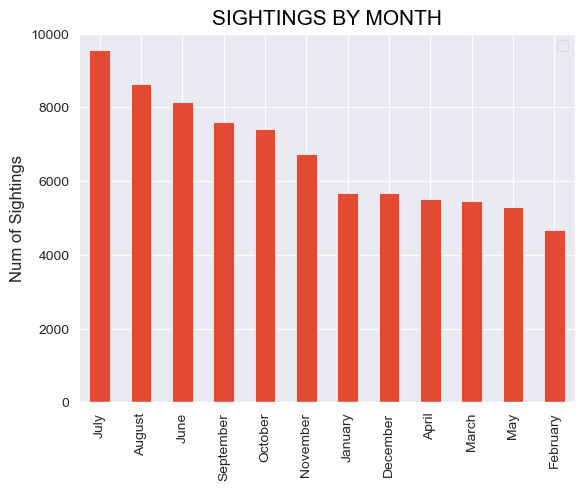

In [148]:
sightings_by_month.plot(kind="bar",
                        rot=90)
plt.title("SIGHTINGS BY MONTH",
          color="black",
          fontsize=15)
plt.legend("") 
plt.ylabel("Num of Sightings") 
plt.xlabel("",
           color="black") 
print("") 




I will also look at what days have the most UFO sightings happened on.

###### **UFO sightings by day**

In [152]:
sightings_by_day = ufo_sightings.groupby("day")["day"].count()
sightings_by_day = pd.DataFrame(data=sightings_by_day)
sightings_by_day = sightings_by_day.rename(columns={"day": "num of sightings"}).sort_values(by="num of sightings", ascending=False)
sightings_by_day

,num of sightings
day,
Saturday,14062
Sunday,11791
Friday,11620
Thursday,11024
Wednesday,10964
Tuesday,10777
Monday,10094


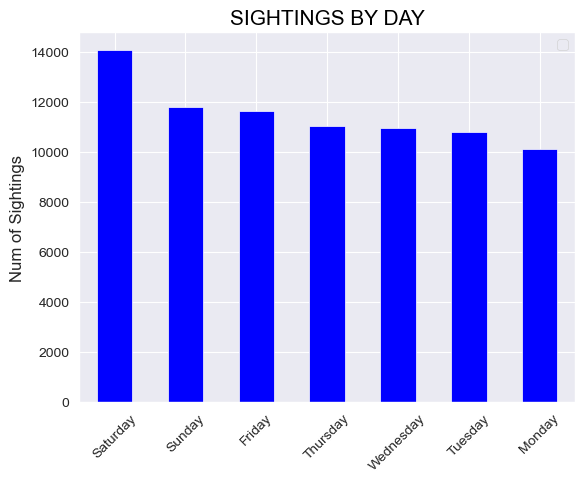

In [158]:
sightings_by_day.plot(kind="bar", 
                      color="blue", 
                      rot=45) 
plt.title("SIGHTINGS BY DAY", 
          color="black",
          fontsize=15)
plt.legend("") 
plt.ylabel("Num of Sightings") 
plt.xlabel("") 
print("") 

The data indicates that the most sightings of UFO's happen on Saturday, while the least amount of UFO sightings happen on Monday.

###### **UFO sightings by hour**

In [161]:
sightings_by_hour = ufo_sightings.groupby("hour")["hour"].count()
sightings_by_hour = pd.DataFrame(data=sightings_by_hour)
sightings_by_hour = sightings_by_hour.rename(columns={"hour": "num of sightings"}).sort_values(by="num of sightings", ascending=False)
sightings_by_hour

,num of sightings
hour,
21,11445
22,10837
20,8617
23,7953
19,6147
0,4802
18,4002
1,3210
17,2592


The most popular hour for UFO sightings is the 2100 hour, which is 9pm. The least popular hour for UFO sightings is the 0800 hour, which is 8am.

Here is a bar graph to visualize the number of sightings by hour.

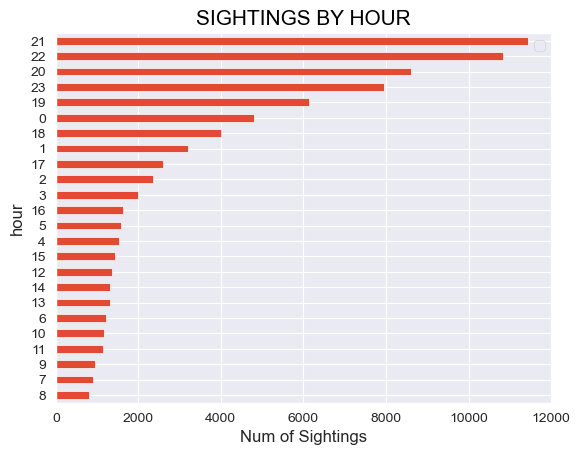

In [167]:
sightings_by_hour.sort_values(by="num of sightings", ascending=True).plot(kind="barh")
plt.title("SIGHTINGS BY HOUR",
          color="black",
          fontsize=15)
plt.legend("") 
plt.xlabel("Num of Sightings") 
print("") 